The Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

1. Data Exploration, Cleaning, Pre-Processing and Feature Engineering

In [1]:
#Loading Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [2]:
#Loading Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train['Source'] = 'train'
test['Source'] = 'test'

In [6]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Source'],
      dtype='object')

In [7]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Source'],
      dtype='object')

In [8]:
def check_col_equal(df1, df2):
    """"
    check if columns are equal in df1 and df2

    Parameters:
    df1: DataFrame
    df2: DataFrame

    Returns:
    bool: True if columns are equal, False otherwise
    """
    df1_cols = df1.columns
    df2_cols = df2.columns
    if len(df1_cols) != len(df2_cols):
        print("df1 and df2 Columns are not Equal")
    else:
        for i in range(len(df1_cols)):
            if df1_cols[i] != df2_cols[i]:
                print("df1 and df2 Columns are not Equal")
                break
        else:
            print("df1 and df2 Columns are Equal")

In [9]:
are_cols_equal = check_col_equal(train, test)

df1 and df2 Columns are not Equal


In [10]:
#check the shape of the data
print("shape of train data: ", train.shape)
print("shape of test data: ", test.shape)

shape of train data:  (8523, 13)
shape of test data:  (5681, 12)


In [11]:
# Append the DataFrames based on column names
data = pd.concat([train, test], axis=0, ignore_index=True, sort=False)

In [12]:
data.shape

(14204, 13)

In [13]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [14]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [15]:
#Check missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

In [16]:
#Note that the Item_Outlet_Sales is the target variable and missing values are ones in the test set. So we need not worry about it. But we’ll impute the missing values in Item_Weight and Outlet_Size in the data cleaning section.

In [17]:
#Check the data types
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Source                        object
dtype: object

In [18]:
#describe the data to understand the distribution of numerical variables
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
#Observations:
#1. The minimum value of Item_Visibility is 0 which is not possible. This means that the data is missing in these columns.
#2. Outlet_Esatablishment_Year vary from 1985 to 2009. the values might not be apt for this form. rather if we convert them to how old the particuar store is, it should have better impact on sales.
#3. the lower count of item weight and Item_Outlet_Sales confirms the findings from the missing value check.         

In [20]:
#check unique values from data
data.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
Source                           2
dtype: int64

In [21]:
#this tells us that there are 1559 products and 10 outlets/stores (which was also mentioned in problem statement). Another thing that should catch attention is that Item_Type has 16 unique values. 

In [22]:
#let explore further using the frequency of different categories in each nominal variables
# Identify categorical columns
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x] == 'object']
# Exclude ID columns and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'Outlet_Identifier']]

In [23]:
# Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s' % col)
    print (data[col].value_counts())


Frequency of Categories for variable Item_Fat_Content
Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

Frequency of Categories for variable Item_Type
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

Frequency of Categories for variable Outlet_Size
Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64

Frequency of Categories for variable Outlet_Location_Type
Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980


In [24]:
#Observation
#1. Item_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.
#2. Item_Type: Not all categories have substantial numbers. It looks like combining them can give better results.
#3. Outlet_Type: Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.

In [25]:
#impute missing values
#determine average weight per item
average_weight_per_item = data.groupby('Item_Identifier')['Item_Weight'].mean()
print(average_weight_per_item)

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64


In [26]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

In [27]:
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]


In [28]:
#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Item_Weight'].isnull()
#Impute data and check #missing values before and after imputation to confirm
print ('Orignal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: average_weight_per_item[x])
print ('Final #missing: %d'% sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


In [29]:
#This confirms that the column has no missing values now. let's impute Outlet_Size with the mode of the Outlet_Size for the particular type of outlet


In [30]:
# Determining the mode for each Outlet_Type
def calculate_mode(series):
    return series.mode().iloc[0]

outlet_size_mode = data.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=calculate_mode)
print('Mode for each Outlet_Type:')
print(outlet_size_mode)

Mode for each Outlet_Type:
                  Outlet_Size
Outlet_Type                  
Grocery Store           Small
Supermarket Type1       Small
Supermarket Type2      Medium
Supermarket Type3      Medium


In [31]:
# Get a boolean variable specifying missing Outlet_Size values
miss_bool = data['Outlet_Size'].isnull()

# Impute data and check #missing values before and after imputation to confirm
print('\nOriginal #missing: %d' % sum(miss_bool))
data.loc[miss_bool, 'Outlet_Size'] = data.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode.loc[x])
print('Final #missing: %d' % sum(data['Outlet_Size'].isnull()))


Original #missing: 4016
Final #missing: 0


In [32]:
#This confirms that there are no missing values in the data.

In [33]:
# Feature Engineering
#1 Considering combing Outlet_Type
data.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [34]:
#This shows significant difference between them and we’ll leave them as it is.

In [35]:
#2 Modify Visibility
#We noticed that the minimum value here is 0, which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that product
#determine average visibiltiy of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')
#print(visibility_avg)
# Get a boolean variable specifying missing Outlet_Size values
miss_bool = data['Item_Visibility'].isnull()

# Impute data and check #missing values before and after imputation to confirm
print('\nOriginal #missing: %d' % sum(miss_bool))
data.loc[miss_bool, 'Item_Visibility'] = data.loc[miss_bool, 'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])
print('Final #missing: %d' % sum(data['Item_Visibility'].isnull()))


Original #missing: 0
Final #missing: 0


C:\Users\Sivakumar.R\AppData\Local\Temp\ipykernel_17920\851179417.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[miss_bool, 'Item_Visibility'] = data.loc[miss_bool, 'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])


In [36]:
# We hypothesized that products with higher visibility are likely to sell more. But along with comparing products on absolute terms, we should look at the visibility of the product in that particular store as compared to the mean visibility of that product across all stores. This will give some idea about how much importance was given to that product in a store as compared to other stores. We can use the ‘visibility_avg’ variable made above to achieve this.
#detrmine another variable with mean ratio
# Assuming visibility_avg is a dictionary with Item_Identifier as keys and their average visibility as values
visibility_avg = data.groupby('Item_Identifier')['Item_Visibility'].mean().to_dict()

# Calculate Item_Visibility_MeanRatio
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility'] / visibility_avg[x['Item_Identifier']], axis=1)

# Print the descriptive statistics of Item_Visibility_MeanRatio
print(data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.000000
std          0.348382
min          0.000000
25%          0.921522
50%          0.962037
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


In [37]:
#create a broad category of type of item
#If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. So I’ve used the Item_Identifier variable to create a new column:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()


Item_Type_Combined
Food              10201
Non-Consumable     2686
Drinks             1317
Name: count, dtype: int64

In [38]:
# Calculate the average sales for each category in Item_Type_Combined
average_sales = data.groupby('Item_Type_Combined')['Item_Outlet_Sales'].mean()

# Define a threshold for high average sales (e.g., above the mean of all categories)
threshold = average_sales.mean()

# Identify categories with high average sales
high_sales_categories = average_sales[average_sales > threshold].index.tolist()

# Combine high sales categories into a new category
data['Item_Sales_Combined'] = data['Item_Type_Combined'].apply(lambda x: 'High_Sales' if x in high_sales_categories else 'Below_Average_Sales')

# Print the updated value counts for Item_Type_Combined
print(data['Item_Sales_Combined'].value_counts())

Item_Sales_Combined
High_Sales             12887
Below_Average_Sales     1317
Name: count, dtype: int64


In [39]:
#Determine the years of operation of the stores
#years
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [40]:
#This shows stores which are 4-28 years old.

In [41]:
#Modify categories of Item_Fat_Content: We found typos and difference in representation in categories of Item_Fat_Content variable.
print ('Original Categories:')
print (data['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (data['Item_Fat_Content'].value_counts())

Original Categories:
Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

Modified Categories:
Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64


In [42]:
# Mark non-consumables as a separate category in Item_Fat_Content
#Change categories of low fat:
print ('Original Categories:')
print (data['Item_Fat_Content'].value_counts())
print ('\nModified Categories:')

data.loc[data['Item_Type_Combined'] == "Non-Consumable", 'Item_Fat_Content'] = "Non-Edible"

# Print the value counts for Item_Fat_Content
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

Modified Categories:
Item_Fat_Content
Low Fat       6499
Regular       5019
Non-Edible    2686
Name: count, dtype: int64


In [43]:
#Since scikit-learn accepts only numerical variables, I converted all categories of nominal variables into numeric types.
#Lets start with coding all categorical variables as numeric using ‘LabelEncoder’ from sklearn’s preprocessing module.
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Item_Sales_Combined', 'Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [44]:
# One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=var_mod)

# Fill NaN values with 0
data_encoded = data_encoded.fillna(0)

# Identify the dummy variable columns
dummy_columns = data_encoded.columns.difference(data.columns)

# Convert boolean values in dummy variable columns to integers
data_encoded[dummy_columns] = data_encoded[dummy_columns].astype(int)

# Display the encoded DataFrame
print("\nOne-Hot Encoded DataFrame:")
print(data_encoded)


One-Hot Encoded DataFrame:
      Item_Identifier  Item_Weight  Item_Visibility              Item_Type  \
0               FDA15         9.30         0.016047                  Dairy   
1               DRC01         5.92         0.019278            Soft Drinks   
2               FDN15        17.50         0.016760                   Meat   
3               FDX07        19.20         0.000000  Fruits and Vegetables   
4               NCD19         8.93         0.000000              Household   
...               ...          ...              ...                    ...   
14199           FDB58        10.50         0.013496            Snack Foods   
14200           FDD47         7.60         0.142991          Starchy Foods   
14201           NCO17        10.00         0.073529     Health and Hygiene   
14202           FDJ26        15.30         0.000000                 Canned   
14203           FDU37         9.50         0.104720                 Canned   

       Item_MRP Outlet_Identifier  

C:\Users\Sivakumar.R\AppData\Local\Temp\ipykernel_17920\827782325.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = data_encoded.fillna(0)


In [45]:
data_encoded.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             int64
Item_Fat_Content_1             int64
Item_Fat_Content_2             int64
Outlet_Location_Type_0         int64
Outlet_Location_Type_1         int64
Outlet_Location_Type_2         int64
Outlet_Size_0                  int64
Outlet_Size_1                  int64
Outlet_Size_2                  int64
Item_Type_Combined_0           int64
Item_Type_Combined_1           int64
Item_Type_Combined_2           int64
Item_Sales_Combined_0          int64
Item_Sales_Combined_1          int64
Outlet_Type_0                  int64
Outlet_Type_1                  int64
O

In [46]:
data_encoded[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)


,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


In [47]:
data_encoded.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'Source', 'Item_Visibility_MeanRatio',
       'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Item_Type_Combined_0',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Item_Sales_Combined_0',
       'Item_Sales_Combined_1', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Outlet_0', 'Outlet_1', 'Outlet_2',
       'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8',
       'Outlet_9'],
      dtype='object')

In [48]:
#Exporting Cleaned Data
#Drop the columns which have been converted to different types:
data_encoded.drop(['Item_Type','Outlet_Establishment_Year'], axis=1, inplace=True)
#Divide into test and train:
train_cleaned = data_encoded.loc[data_encoded['Source']=="train"]
test_cleaned = data_encoded.loc[data_encoded['Source']=="test"]

#Drop unnecessary columns:
test_cleaned.drop(['Item_Outlet_Sales','Source'],axis=1,inplace=True)
train_cleaned.drop(['Source'],axis=1,inplace=True)

#Export files as modified versions:
train_cleaned.to_csv("train_cleaned.csv",index=False)
test_cleaned.to_csv("test_cleaned.csv",index=False)

C:\Users\Sivakumar.R\AppData\Local\Temp\ipykernel_17920\2131882517.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cleaned.drop(['Item_Outlet_Sales','Source'],axis=1,inplace=True)
C:\Users\Sivakumar.R\AppData\Local\Temp\ipykernel_17920\2131882517.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned.drop(['Source'],axis=1,inplace=True)


2. Model Building:

a. Baseline Model:
Baseline model is the one which requires no predictive model and its like an informed guess.

In [49]:
#In this case lets predict the sales as the overall average sales. This will be our baseline model.
#Mean based:
mean_sales = train['Item_Outlet_Sales'].mean()

#Define a dataframe with IDs
base1 = test_cleaned[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales 

#Export file
base1.to_csv("base1.csv",index=False)

C:\Users\Sivakumar.R\AppData\Local\Temp\ipykernel_17920\3525893724.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base1['Item_Outlet_Sales'] = mean_sales


In [50]:
base1.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,2181.288914
8524,FDW14,OUT017,2181.288914
8525,NCN55,OUT010,2181.288914
8526,FDQ58,OUT017,2181.288914
8527,FDY38,OUT027,2181.288914


Taking overall mean is simplestway. lets ook at on 1. Average sales by Product and 2. Average sales by product in particular outlet type

In [51]:
train_cleaned.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Item_Outlet_Sales', 'Item_Visibility_MeanRatio',
       'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Item_Type_Combined_0',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Item_Sales_Combined_0',
       'Item_Sales_Combined_1', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Outlet_0', 'Outlet_1', 'Outlet_2',
       'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8',
       'Outlet_9'],
      dtype='object')

In [52]:
# Calculate average sales by product
average_sales_by_product = train_cleaned.groupby('Item_Identifier')['Item_Outlet_Sales'].mean().reset_index()

In [53]:
print(average_sales_by_product)

     Item_Identifier  Item_Outlet_Sales
0              DRA12        1843.600200
1              DRA24        2246.218971
2              DRA59        2614.430150
3              DRB01        1518.024000
4              DRB13        2428.838400
...              ...                ...
1554           NCZ30        1807.647000
1555           NCZ41        1827.487840
1556           NCZ42        3839.801760
1557           NCZ53        3014.742400
1558           NCZ54        3249.104000

[1559 rows x 2 columns]


In [54]:
#Define a dataframe with IDs
base2 = test_cleaned[['Item_Identifier','Outlet_Identifier']]
# Merge the average sales data with base2
base2 = base2.merge(average_sales_by_product, on='Item_Identifier', how='left')     



In [55]:
base2.isna().sum()

Item_Identifier      0
Outlet_Identifier    0
Item_Outlet_Sales    0
dtype: int64

In [56]:
#Export file
base2.to_csv("base2_sales_avg_by_item.csv",index=False)

In [57]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
        
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

2. Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define predictors by excluding target and ID columns
predictors = [x for x in train_cleaned.columns if x not in [target] + IDcol]

# Initialize StandardScaler
scaler = StandardScaler()

# Normalize the training and testing data
train_cleaned[predictors] = scaler.fit_transform(train_cleaned[predictors])
test_cleaned[predictors] = scaler.transform(test_cleaned[predictors])

# Initialize Linear Regression model
alg1_LR = LinearRegression()



C:\Users\Sivakumar.R\AppData\Local\Temp\ipykernel_17920\2907143989.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned[predictors] = scaler.fit_transform(train_cleaned[predictors])
C:\Users\Sivakumar.R\AppData\Local\Temp\ipykernel_17920\2907143989.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cleaned[predictors] = scaler.transform(test_cleaned[predictors])



Model Report
RMSE : 1128
CV Score : Mean - 1129 | Std - 43.55 | Min - 1075 | Max - 1211


C:\Users\Sivakumar.R\AppData\Local\Temp\ipykernel_17920\3075489670.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target] = alg.predict(dtest[predictors])


<Axes: title={'center': 'Model Coefficients'}>

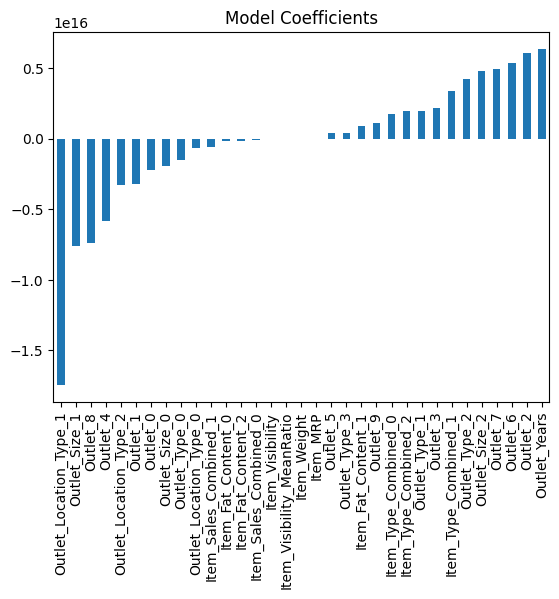

In [59]:
# Fit the model, perform cross-validation, and make predictions
modelfit(alg1_LR, train_cleaned, test_cleaned, predictors, target, IDcol, 'alg1_LR.csv')

# Extract and sort model coefficients
coef1 = pd.Series(alg1_LR.coef_, predictors).sort_values()

# Plot the model coefficients
coef1.plot(kind='bar', title='Model Coefficients')